# Seattle Incomes and Housing Costs

If you decide to move to Seattle, one of the first things that you'll discover is the high cost of living. In terms of characterizing a city, the income levels and cost of housing are key factors, and determine a lot of the dynamics in a city's geography. 

Fortunately, the Census Bureau provides a number of measures of both income and cost of housing. First, let's start by importing a bunch of modules we'll need.

(Note that this uses the [15Metro module](http://github.com/charlesreid1/15metro) that I have authored, which is on Github.)


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import statsmodels.api as sm
from scipy import stats

import metro as mt


Now I'll start by exploring data from census table 19301:

```
B19301 : Per Capita Income in the Past 12 Months (In 2013 Inflation-adjusted Dollars)
```

While per capita income smears out any information about the distribution of incomes, it is acceptable as a first-pass proxy for wealth and income levels for a given census tract. Now let's plot some data from table 19301:


In [4]:
def do_19301():

    from Table19301 import Table19301

    # Seaborn 
    sns.set_palette("deep", desat=.6)
    sns.set_context(rc={"figure.figsize": (8, 4)})
    
    for city in cities:

        mogo = mt.MetroMogo()
        df = mogo.get_df(city,tablecode="B19301")

        df = Table19301(df)

        #######################
        # KDE plot:
        #
        # per capita income

        f, ax1 = plt.subplots(1, 1, sharex=True, figsize=(8, 8))
        ax1.set_title(cities[0])

        colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
        xcp = sns.xkcd_palette(colors)

        # --------------
        # subplot 1

        xcode = 'PerCapitaIncome'
        xlabel=xcode

        df2 = df[df[xcode]>0]

        def thousands(x, pos):
            'The two args are the value and tick position'
            return '$%1.0fk' % (x*1e-3)

        fmt = FuncFormatter(thousands)
        ax1.set_xlim([0,120000])
        ax1.xaxis.set_major_formatter(fmt)
        sns.kdeplot(df[xcode], shade=True, color=xcp[0], ax=ax1)

        ax1.set_xlabel('Per Capita Income')
        ax1.set_ylabel('Probability Density')

        plt.show()


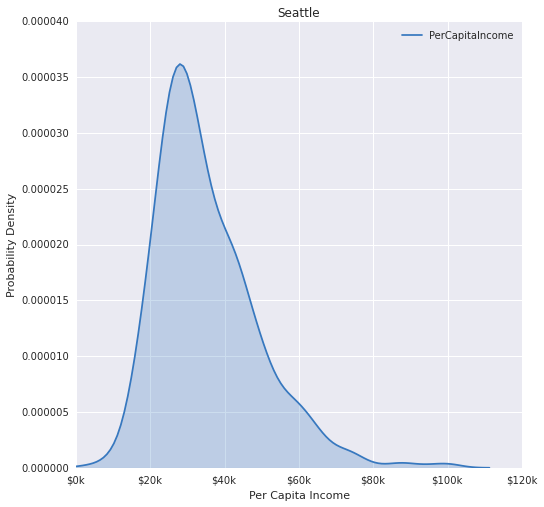

In [5]:
cities = ['Seattle']
do_19301()

(Just a note on the y-axis scale: a KDE is a smoothed probability density function, and like any probability density function, it must integrate to 1. Thus, as the units on the x-axis become larger, the units on the y-axis become smaller. This provides an advantage in that KDEs for similar quantities can be compared across different populations - for example, when comparing the PDF of per capita income of multiple cities.)

Next, I found a table that had information about monthly cost of housing for different census tracts:



I repeated the same procedure, and created a probability density plot of median monthly housing costs:

In [12]:
def do_25105():

    from Table25105 import Table25105

    # Seaborn 
    sns.set_palette("deep", desat=.6)
    sns.set_context(rc={"figure.figsize": (8, 4)})
    
    for city in cities:

        mogo = mt.MetroMogo()
        df = mogo.get_df(city,tablecode="B25070")

        df = Table25105(df)


        #######################
        # KDE plot:
        #
        # per capita income

        f, ax1 = plt.subplots(1, 1, sharex=True, figsize=(8, 8))
        ax1.set_title(cities[0])

        colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
        xcp = sns.xkcd_palette(colors)

        # -------------
        # subplot 1

        xcode = 'MedianMonthlyHousingCosts'
        xlabel=xcode
        
        def thousands(x, pos):
            'The two args are the value and tick position'
            return '$%1.1fk' % (x*1e-3)

        fmt = FuncFormatter(thousands)
        ax1.set_xlim([0,4000])
        ax1.xaxis.set_major_formatter(fmt)

        sns.kdeplot(df[xcode], shade=True, color=xcp[3], ax=ax1)
        ax1.set_xlabel("Median Monthly Housing Costs")
        ax1.set_ylabel("Probability Density")

        plt.show()



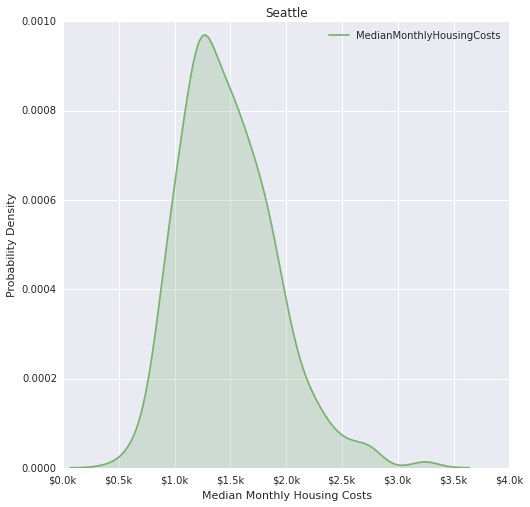

In [13]:
cities = ['Seattle']
do_25105()

Now, we can put these two plots together to compare the distribution of income levels and housing costs among Seattle census tracts. This method grabs the same information from the database, but re-scales monthly housing costs into yearly housing costs, and plots the two quantities on top of each other. Here's how that looks:

In [20]:
def do_incomescosts():

    from Table19301 import Table19301
    from Table25105 import Table25105

    # Seaborn 
    sns.set_palette("deep", desat=.6)
    sns.set_context(rc={"figure.figsize": (8, 4)})
    
    for city in cities:

        mogo = mt.MetroMogo()
        df = mogo.get_df(city,tablecode="B19301")

        df = Table19301(df)
        df = Table25105(df)


        #######################
        # KDE plot:
        #
        # per capita income

        f, ax1 = plt.subplots(1, 1, sharex=True, figsize=(8, 8))
        ax1.set_title(cities[0])

        colors = ["windows blue", "dusty purple", "greyish", "faded green", "amber"]
        xcp = sns.xkcd_palette(colors)

        # ------------------
        # subplot 1

        def thousands(x, pos):
            'The two args are the value and tick position'
            return '$%1.0fk' % (x*1e-3)

        fmt = FuncFormatter(thousands)
        ax1.set_xlim([0,120000])
        ax1.xaxis.set_major_formatter(fmt)
        
        xcode = 'MedianMonthlyHousingCosts'
        xlabel=xcode
        sns.kdeplot(df[xcode]*12, shade=True, color=xcp[0], ax=ax1)

        xcode = 'PerCapitaIncome'
        xlabel=xcode
        sns.kdeplot(df[xcode], shade=True, color=xcp[1], ax=ax1)

        ax1.set_xlabel('Annual Housing Costs and Per Capita Income')
        ax1.set_ylabel('Probability Density')

        plt.show()


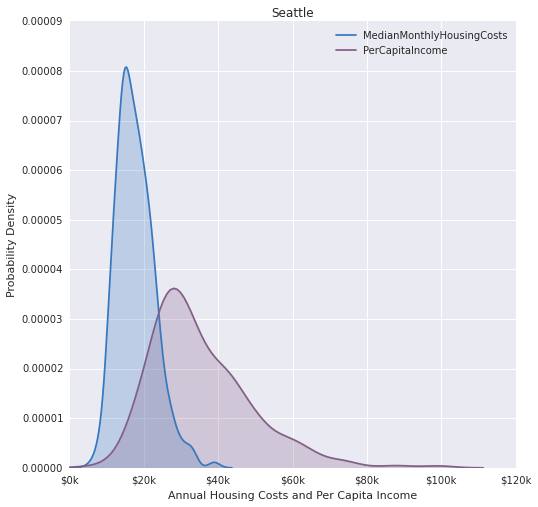

In [21]:
cities = ['Seattle']
do_incomescosts()

Alright! This is what we wanted to see.

The first thing you'll notice is how tight the distribution of annual housing costs is. That indicates that there's a ceiling on the value of a place to live, and in Seattle, it's around $30,000 per year. I would definitely expect that to change from city to city - one city's ceiling is another's median!

In contrast, the income distribution is much fatter. The variance in the per capita income - that is, the value that is brought into an area via earned income - varies much more widely. We would expect that most costs of living - food, housing, transportation, etc. - would similarly have a small ceiling.

There's an income threshold beyond which even the most lavish living would have little consequence on bottom line.

The amount of overlap between these two distributions also gives an indication of how closely housing costs track income levels. While a joint PDF of annual housing costs and per capita income would reveal more about the relationship between these two variables (a relationship that is collapsed by computing the marginal PDF, as with the above KDEs), this overlap area still gives an indication of the trend.